In [1]:
import struct
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
def read_img_idx(file):
    f = open(file,'rb')
    data = f.read(16)
    magic, no_items, no_rows, no_cols = struct.unpack('>IIII',data)
    img_arr = np.zeros((no_items, no_rows, no_cols))
    no_bytes = no_items * no_rows * no_cols
    img_arr =  np.asarray(struct.unpack('>'+'B'*no_bytes,f.read(no_bytes))).reshape((no_items,no_rows,no_cols))
    return img_arr


In [3]:
def read_lbl_idx(file):
    f = open(file, 'rb')
    data = f.read(8)
    magic, no_items = struct.unpack('>II', data)
    lbl_arr = np.zeros(no_items)
    no_bytes = no_items
    lbl_arr = np.asarray(struct.unpack('>'+'B'*no_bytes, f.read(no_bytes)))
    return lbl_arr

In [4]:
def sigm_act_func(v):
    return 1/(1+np.exp(-v))

In [5]:
def deri_act_func(v):
    return (sigm_act_func(v) * (1 - sigm_act_func(v)))

In [6]:
def convert(data):
   new_data = []
   for i in range(len(data)):
       temp = [0]*10
       temp[data[i]] = 1
       new_data.append(temp)
   return new_data

In [13]:
X_train = read_img_idx('train-images-idx3-ubyte')
Y_train = read_lbl_idx('train-labels-idx1-ubyte')
X_test = read_img_idx('t10k-images-idx3-ubyte')
Y_test = read_lbl_idx('t10k-labels-idx1-ubyte')

In [14]:
X_train = X_train/255
X_test = X_test/255
X_train = [x.reshape(1,784) for x in X_train]
X_test = [x.reshape(1,784) for x in X_test]


In [15]:
w1 = np.random.uniform(low=-1, high=1, size=(784,200))
b1 = np.random.uniform(low=-1, high=1, size=(1,200))
w2 = np.random.uniform(low=-1, high=1, size=(200,10))
b2 = np.random.uniform(low=-1, high=1, size=(1,10))
learning_rate = 200

In [16]:
epoch = 0
Y_train  = convert(Y_train)
Y_test = convert(Y_test)

In [17]:
mse_tr =[]
mse_te =[]
mis_tr = []
mis_te = []

In [18]:
while True:
    y = []
    y2 = []
    tr_count = 0
    te_count = 0
    for i in range(len(X_train)):
        v1 = np.matmul(X_train[i],w1) + b1
        y1 = sigm_act_func(v1)
        v2 = np.matmul(y1,w2) + b2
        y.append(sigm_act_func(v2))
        out = [0]*10
        ind = y[i].argmax(axis = 1)[0]
        out[ind] =1
       
        err = (np.asarray(Y_train[i])-np.asarray(out)) 
        if np.linalg.norm(err) == 0:
            tr_count += 1
        
        diff = (((-2*learning_rate*(Y_train[i]-y[i]))/len(X_train))*deri_act_func(v2))
        grad_w2 = y1.T.dot(diff)
        diff1 = diff.dot(w2.T) * deri_act_func(v1)
        grad_w1 = X_train[i].T.dot(diff1)


        grad_b1 = diff.dot(w2.T)
        grad_b2 = np.full((1, 10), diff)

        w1 = np.subtract(w1, np.asarray(grad_w1))
        w2 = np.subtract(w2, np.asarray(grad_w2))
        b1 = np.subtract(b1, np.asarray(grad_b1))
        b2 = np.subtract(b2, np.asarray(grad_b2))
    tr_acc = tr_count/len(X_train)
    print(tr_acc)
    t1 = len(X_train) - tr_count
    mis_tr.append(t1)
    min_serror = 0
    for i in range(len(X_train)):
        min_serror+= np.linalg.norm(y[i]-Y_train[i])**2
    min_serror= min_serror/len(X_train)
    mse_tr.append(min_serror)
    print("MSE", min_serror)
    for i in range(len(X_test)):
        v1 = np.matmul(X_test[i],w1) + b1
        y1 = sigm_act_func(v1)
        v2 = np.matmul(y1,w2) + b2
        y2.append(sigm_act_func(v2))
        out = [0]*10
        ind = y2[i].argmax(axis = 1)[0]
        out[ind] = 1
        temp = (np.asarray(Y_test[i])-np.asarray(out))
       
        if np.linalg.norm(temp) == 0:
            te_count += 1
    te_acc = te_count/len(X_test)
    print(te_acc)
    t2 = len(X_test) - te_count
    mis_te.append(t2)
    min_serrorT = 0
    for i in range(len(X_test)):
        min_serrorT += np.linalg.norm(y2[i]-Y_test[i])**2
    min_serrorT = min_serrorT/len(X_test)
    mse_te.append(min_serrorT)
    print("MSET", min_serrorT)
    if te_acc > 0.95:
        break
    epoch += 1
        

0.26981666666666665
MSE 0.8639445661283649
0.4518
MSET 0.6931139108632975
0.5977
MSE 0.533683007398344
0.7189
MSET 0.4010855502264266
0.7527333333333334
MSE 0.3524699409619503
0.7795
MSET 0.3103254510180841
0.78515
MSE 0.30231269724647836
0.7983
MSET 0.28261612947650444
0.8008333333333333
MSE 0.2787171887992581
0.8096
MSET 0.2658409526742765
0.81105
MSE 0.2627098884247116
0.8181
MSET 0.25363911328759964
0.8182666666666667
MSE 0.2509587343418651
0.8235
MSET 0.24457854890089176
0.8238666666666666
MSE 0.24173991320573754
0.828
MSET 0.2373468110513988
0.8281333333333334
MSE 0.2341369515622205
0.831
MSET 0.23146413571733182
0.8318
MSE 0.22773712491217604
0.834
MSET 0.2265307090195136
0.8348
MSE 0.2221893875660583
0.8366
MSET 0.2222562446641733
0.8376833333333333
MSE 0.21727782349673264
0.8392
MSET 0.21846840104586723
0.84045
MSE 0.21286756259637027
0.8421
MSET 0.21506517220886434
0.8429833333333333
MSE 0.20885054940780903
0.8434
MSET 0.21197698207139543
0.8547333333333333
MSE 0.203813968721

In [19]:
epoch

28

Accuracy of 95.03 % on testing data acheived.

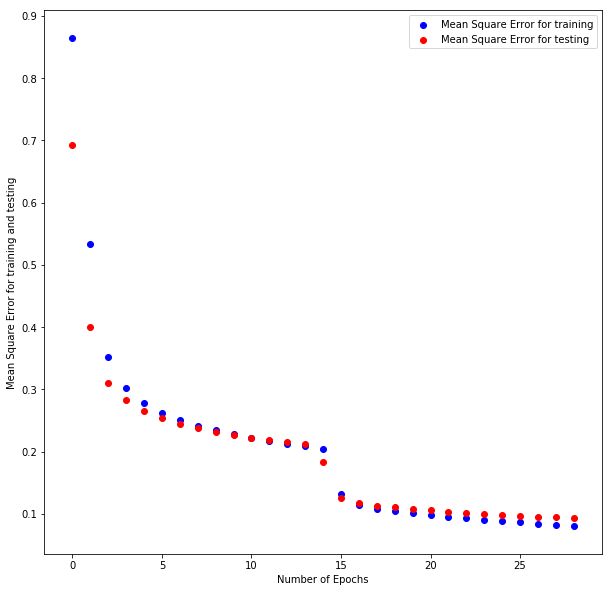

In [20]:
plt.figure(figsize=(10,10))
plt.ylabel('Mean Square Error for training and testing')
plt.xlabel('Number of Epochs')
plt.scatter(range(len(mse_tr)), mse_tr, c = 'blue', label = 'Mean Square Error for training')
plt.scatter(range(len(mse_te)), mse_te, c = 'red', label = 'Mean Square Error for testing')

plt.legend()
plt.show()

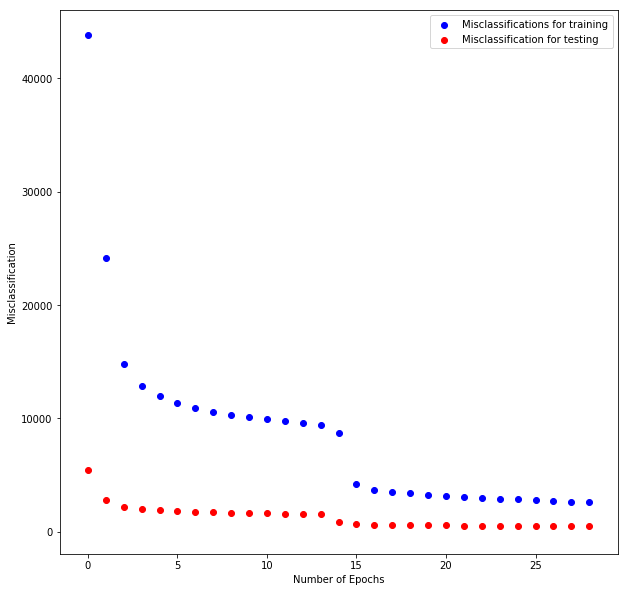

In [21]:
plt.figure(figsize=(10,10))
plt.ylabel('Misclassification')
plt.xlabel('Number of Epochs')
plt.scatter(range(len(mis_tr)), mis_tr, c = 'blue', label = 'Misclassifications for training')
plt.scatter(range(len(mis_te)), mis_te, c = 'red', label = 'Misclassification for testing')

plt.legend()
plt.show()